In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [97]:
# Load data from CSV
file_path = 'products.csv'  # Path to your CSV file
df = pd.read_csv(file_path)

In [98]:
# Check the first few rows of the dataframe
print(df.head())

                                                Name Price
0  Banhey Rearview Mirror Phone Holder for Car-Up...    79
1  Controller DOUBLE Vibration Wireless Joysticks...   358
2  DOBE Dual Shock 4 Controller Charging Docking ...   925
3  Wireless Controller Dual Vibration Game Gamepa...   350
4  PS4 Controller Charger Dock Station with Charg...   575


In [99]:
# Remove commas from prices and convert them to numeric values
df['Price'] = df['Price'].replace({',': ''}, regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Convert prices to numeric, set invalid values to NaN

In [100]:
# Basic data analysis
average_price = df['Price'].mean()  # Calculate the average price
average_price

799.6848816029144

In [101]:
cheapest_product = df.loc[df['Price'].idxmin()]  # Find the cheapest product
cheapest_product

Name     PS4 Batman: Arkham Knight (EU)
Price                                44
Name: 390, dtype: object

In [102]:
most_expensive_product = df.loc[df['Price'].idxmax()]  # Find the most expensive product
most_expensive_product

Name     Tennis World Tour 2: Complete Edition (PS5)
Price                                          11999
Name: 442, dtype: object

In [103]:
# Handling missing or invalid prices
df_cleaned = df.dropna(subset=['Price'])  # Drop rows where price is missing or invalid

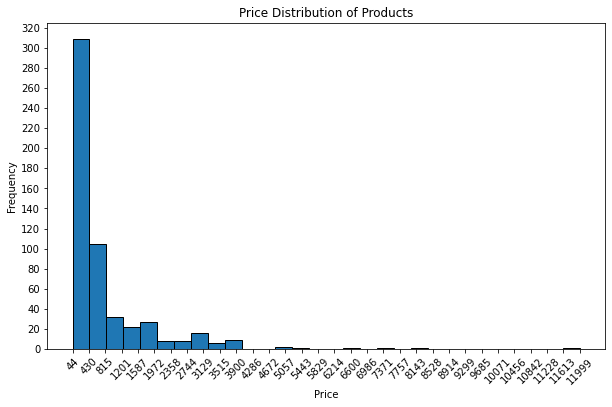

In [104]:
# Visualization (Optional)
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Price'], bins=30, edgecolor='black')
plt.title('Price Distribution of Products')
plt.xlabel('Price')
plt.ylabel('Frequency')
tick_positions = np.linspace(df_cleaned['Price'].min(), df_cleaned['Price'].max(), 32)  # 10 ticks
plt.xticks(tick_positions, rotation=45)
y_ticks = np.arange(0, max(plt.gca().get_ylim()), step=20)  # Adjust step as needed
plt.yticks(y_ticks)
plt.show()

In [105]:
most_price_range = df_cleaned[(df_cleaned['Price'] >= 44) & (df_cleaned['Price'] <= 430)]

most_price_range.head()


,Name,Price
0,Banhey Rearview Mirror Phone Holder for Car-Up...,79
1,Controller DOUBLE Vibration Wireless Joysticks...,358
3,Wireless Controller Dual Vibration Game Gamepa...,350
6,"Mcbazel PS5 Edge Controller Charger, PS5 Charg...",319
7,GUSTAVE® Waterproof Storage Bag for Sony PS5 C...,260


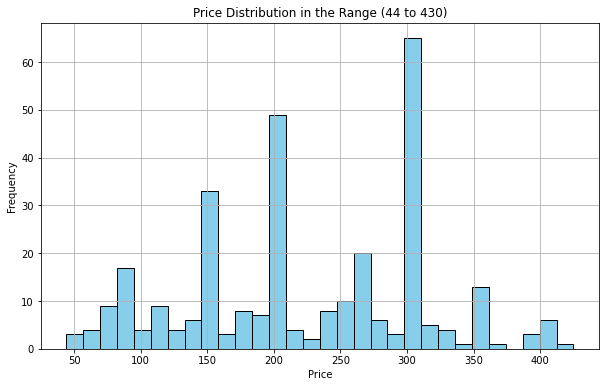

In [106]:
# Plot the histogram for the filtered prices
plt.figure(figsize=(10, 6))
plt.hist(most_price_range['Price'], bins=30, edgecolor='black', color='skyblue')
plt.title('Price Distribution in the Range (44 to 430)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [107]:
# Optional: Sort by price to see the products from cheapest to most expensive
df_sorted = df.sort_values(by='Price')

# Display top 10 cheapest products
print("\nTop 10 Cheapest Products:")
df_sorted.head(10)



Top 10 Cheapest Products:


,Name,Price
390,PS4 Batman: Arkham Knight (EU),44
423,2K Top Spin 25 - USK [Playstation 5],50
164,"TECTINTER PS5 PS4 Carrying Case, Travel Case f...",50
49,"PXN PC Racing Wheel, V3II 180 Degree Universal...",59
263,PlayStation Portal Remote Player - PlayStation 5,64
42,Neuvikter 4 Pcs for PS4 PS3 PS2 Xbox 360 ONE C...,65
369,Add-Ons PS4 Pro Batman #2 Skin For PlayStation 4,69
86,"Tihebeyan Analogue Joystick, 3D Analogue Stick...",73
0,Banhey Rearview Mirror Phone Holder for Car-Up...,79
13,Banhey Rearview Mirror Phone Holder for Car-Up...,79


In [108]:
# Display top 10 most expensive products
print("\nTop 10 Most Expensive Products:")
df_sorted.tail(10)


Top 10 Most Expensive Products:


,Name,Price
145,شنطه بلاستيشن 5 حقيبة PS5 فايف,3999
198,Konami Silent Hill 2 - PS5,3999
187,Mcbazel PS5 Slim Faceplate Replacement Plate f...,3999
302,"Rise of the Ronin PS5, jeu vidéo Action-RPG, V...",4849
88,Gamer X PS4 Slim dust cover,4899
55,Logitech G435 LIGHTSPEED Wireless Gaming Heads...,5423
457,Team 17 OVERCOOKED ALL YOU CAN EAT PS5,6499
78,Logitech G502 HERO High Performance Wired Gami...,7479
46,Rockstar Red Dead Redemption 2 Multi Platform ...,8299
442,Tennis World Tour 2: Complete Edition (PS5),11999


In [109]:
# Summary statistics for the price
summary_stats = most_price_range['Price'].describe()
print(summary_stats)

count    308.000000
mean     223.272727
std       86.602486
min       44.000000
25%      150.000000
50%      200.000000
75%      300.000000
max      425.000000
Name: Price, dtype: float64


C:\Users\kyrellos\AppData\Local\Temp\ipykernel_25304\819163026.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_price_range['Price Segment'] = pd.cut(most_price_range['Price'], bins=bins, labels=labels)


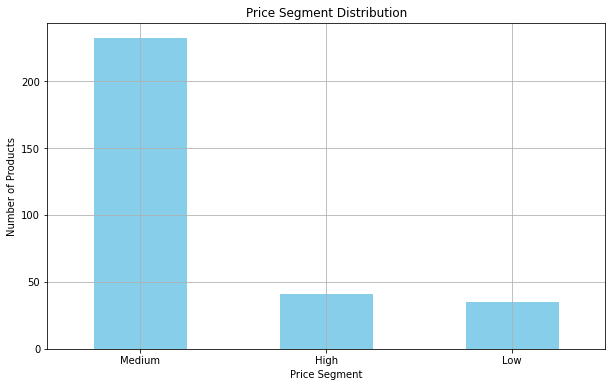

In [110]:
# Define price segments (e.g., Low, Medium, High)
bins = [0, 100, 300, 430]  # Price bins
labels = ['Low', 'Medium', 'High']
most_price_range['Price Segment'] = pd.cut(most_price_range['Price'], bins=bins, labels=labels)

# Analyze the number of products in each segment
price_segment_counts = most_price_range['Price Segment'].value_counts()

# Plot the segment distribution
price_segment_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Price Segment Distribution')
plt.xlabel('Price Segment')
plt.ylabel('Number of Products')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


In [118]:
# Create a new 'PriceCategory' column based on price ranges
def categorize_price(price):
    if price < 850:
        return 'Low'
    elif 850 <= price < 3000:
        return 'Medium'
    else:
        return 'High'

df_cleaned['PriceCategory'] = df_cleaned['Price'].apply(categorize_price)

# Display the unique price categories
print(df_cleaned['PriceCategory'].value_counts())


Low       414
Medium    112
High       23
Name: PriceCategory, dtype: int64


C:\Users\kyrellos\AppData\Local\Temp\ipykernel_25304\1590133384.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="Blues_d")


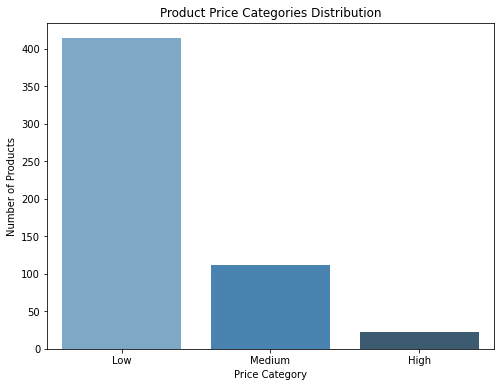

In [130]:
# Count the occurrences of each price category
category_counts = df_cleaned['PriceCategory'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="Blues_d")

# Add labels and title
plt.title("Product Price Categories Distribution")
plt.xlabel("Price Category")
plt.ylabel("Number of Products")
plt.show()

In [120]:
# Vectorize product names (X) and target category (y)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_cleaned['Name'])
y = df_cleaned['PriceCategory']  # This is now categorical ('Low', 'Medium', 'High')

In [121]:
# The target variable (Price)
y = df_cleaned['Price']

In [122]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [124]:
# Predict the prices on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

# Print the model performance
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 1693422.4131767221
Root Mean Squared Error (RMSE): 1301.3156470190936


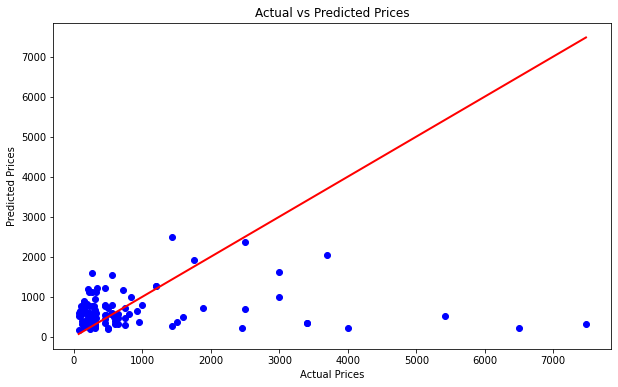

In [125]:
# Visualize the predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [135]:
# Predict the price of a new product (example)
new_product_name = ["New PS5 Controller - Red Color"]
new_product_features = vectorizer.transform(new_product_name)
predicted_price = model.predict(new_product_features)

print(f'Predicted Price for the new product: {predicted_price[0]}')

Predicted Price for the new product: 509.545


In [136]:
# Predict the price of a new product (example)
new_product_name2 = ["PS Controller - Black Color"]
new_product_features2 = vectorizer.transform(new_product_name2)
predicted_price2 = model.predict(new_product_features2)

print(f'Predicted Price for the new product: {predicted_price2[0]}')

Predicted Price for the new product: 286.61


In [140]:
# Predict the price of a new product (example)
new_product_name3 = ["Logitech Wired Gaming Mouse"]
new_product_features3 = vectorizer.transform(new_product_name3)
predicted_price3 = model.predict(new_product_features3)

print(f'Predicted Price for the new product: {predicted_price3[0]}')

Predicted Price for the new product: 283.07
